In [1]:
# For data manipulation and analysis
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical computations
import matplotlib.pyplot as plt   # For data visualization (basic plots)
import seaborn as sns             # For advanced statistical visualizations

%matplotlib inline


# Load the fraud detection dataset
data = pd.read_csv('Fraud_Detection.csv')

# Display the first five rows of the dataset
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
# Convert 'step' into actual time features (day, hour, etc.)
data['hour'] = data['step'] % 24

In [ ]:
#Diff of Orig and Dest
data['balance_diff_orig'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balance_diff_dest'] = data['oldbalanceDest'] - data['newbalanceDest']

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'data' is your DataFrame and 'amount' is the column containing transaction amounts
scaler = StandardScaler()

# Normalize the 'amount' column
data['normalized_amount'] = scaler.fit_transform(data[['amount']])

# Display the first few rows to check the normalized values
print(data[['amount', 'normalized_amount']].head())

     amount  normalized_amount
0   9839.64          -0.281560
1   1864.28          -0.294767
2    181.00          -0.297555
3    181.00          -0.297555
4  11668.14          -0.278532


In [ ]:
# Check for missing values in the dataset
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
# Remove rows with NaN values
data = data.dropna()

In [ ]:
# Map the 'type' column's categorical values to numerical representations
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Assume 'data' is your dataset
# Drop irrelevant columns: 'nameOrig', 'nameDest' (unique to each transaction), and 'isFlaggedFraud'
X = data.drop(['isFraud', 'nameDest', 'nameOrig', 'isFlaggedFraud','step'], axis=1)
y = data['isFraud']  # Target variable: Fraud flag

# Handling Class Imbalance
# The dataset is imbalanced since fraudulent transactions make up only a small portion using SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets (using 10% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training data
X_test = scaler.transform(X_test)  # Only transform the test data

# Output the shape of the original and resampled datasets to check the balancing
print(f"Original dataset shape: {X.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}")

print(f"Before SMOTE, counts of label '1' (fraud): {sum(y == 1)}")
print(f"After SMOTE, counts of label '1' (fraud): {sum(y_resampled == 1)}")

Original dataset shape: (6362620, 10)
Resampled dataset shape: (12708814, 10)
Before SMOTE, counts of label '1' (fraud): 8213
After SMOTE, counts of label '1' (fraud): 6354407


Number of components after PCA: 5


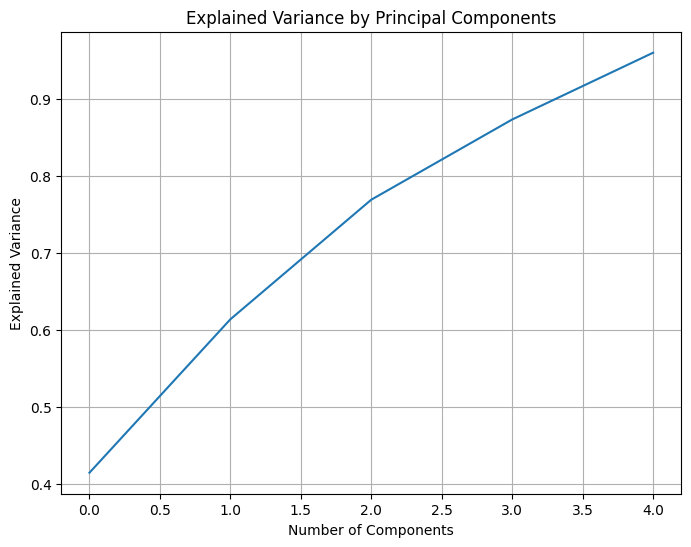

In [ ]:
from sklearn.decomposition import PCA

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)



# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Print the number of components after PCA
print(f"Number of components after PCA: {pca.n_components_}")

# Plot the explained variance ratio of each principal component
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84    635595
           1       0.87      0.76      0.81    635287

    accuracy                           0.83   1270882
   macro avg       0.83      0.83      0.82   1270882
weighted avg       0.83      0.83      0.82   1270882

Logistic Regression Accuracy: 0.8254747490325617


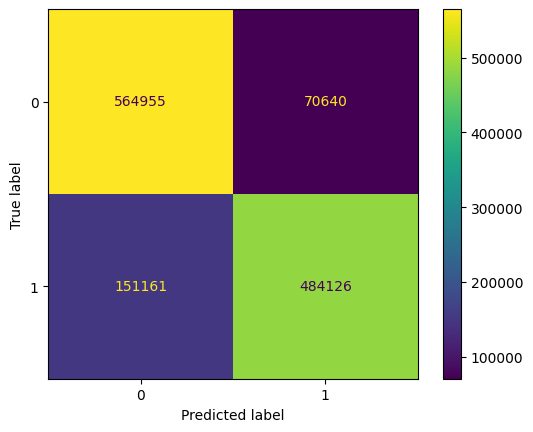

In [ ]:
# Logistic Regression Accuracy with PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA to the training set
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)

# Apply the same transformations to the test set
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

# Train Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_pca, y_train)

# Make predictions with Logistic Regression
y_pred_lr = lr.predict(X_test_pca)

# Evaluate Logistic Regression
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr.classes_).plot()

# Show the confusion matrix plot
plt.show()



Cross-validation scores: [0.92873014 0.92863441 0.92899546 0.92913665 0.92883677]
Mean cross-validation accuracy: 0.9289
Standard deviation of cross-validation accuracy: 0.0002
              precision    recall  f1-score   support

           0       0.91      0.96      0.93    635595
           1       0.96      0.90      0.93    635287

    accuracy                           0.93   1270882
   macro avg       0.93      0.93      0.93   1270882
weighted avg       0.93      0.93      0.93   1270882

Accuracy: 0.9289
Confusion Matrix:


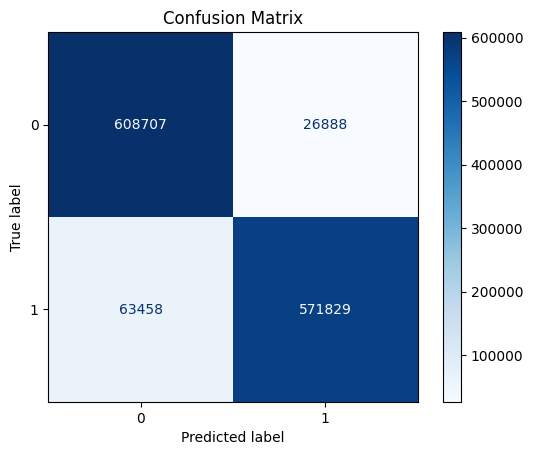

Precision-Recall AUC: 0.9817
Matthews Correlation Coefficient (MCC): 0.8592


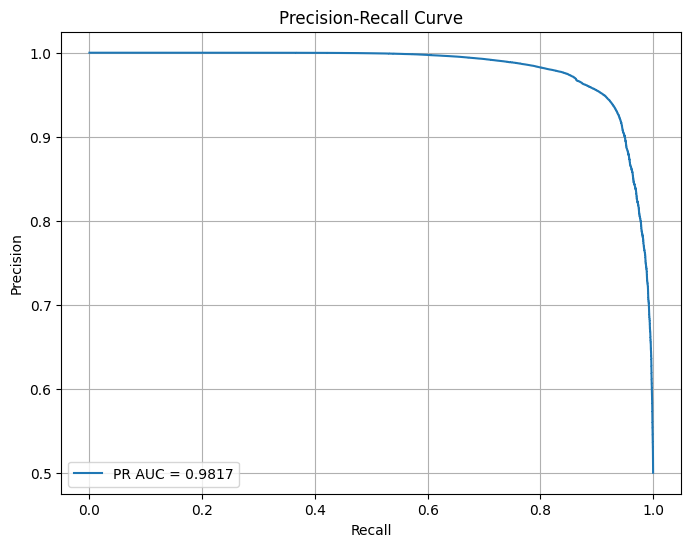

In [ ]:
# Logistic Regression Accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    auc,
    matthews_corrcoef
)
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt

# Train a Logistic Regression model
lr = LogisticRegression()

# Cross-validation with Stratified K-Fold to handle imbalanced classes
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(lr, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation accuracy: {cross_val_scores.mean():.4f}")
print(f"Standard deviation of cross-validation accuracy: {cross_val_scores.std():.4f}")

# Train the model on the full training set
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]  # Probabilities for PR AUC

# Classification Report
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
print("Logistic Regression - Classification Report:")
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


Precision-Recall AUC: 0.9832
Matthews Correlation Coefficient (MCC): 0.8681
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    635595
           1       0.96      0.90      0.93    635287

    accuracy                           0.93   1270882
   macro avg       0.93      0.93      0.93   1270882
weighted avg       0.93      0.93      0.93   1270882

Decision Tree Accuracy: 0.9331


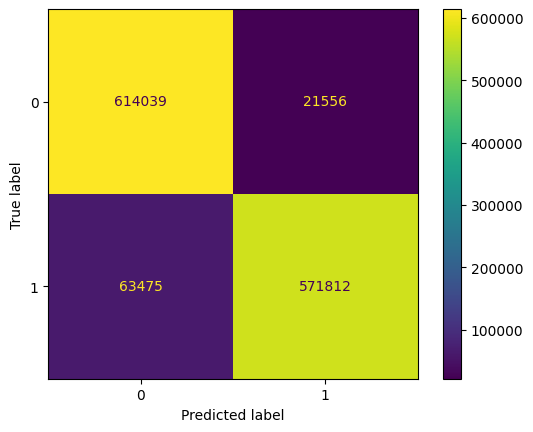

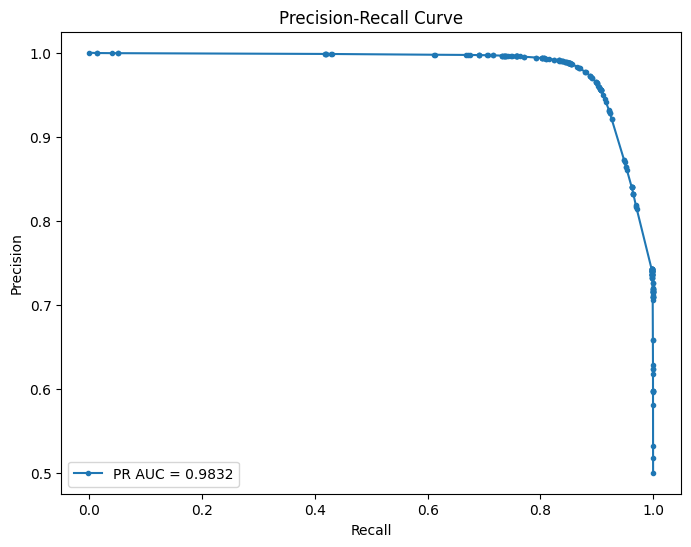

In [ ]:
# Decision Tree  Classifier with PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    auc,
    matthews_corrcoef
)
import matplotlib.pyplot as plt

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train_pca, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test_pca)
y_pred_proba_dt = dt.predict_proba(X_test_pca)[:, 1]  # Get probabilities for the positive class

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_dt)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred_dt)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Classification Report & Accuracy
print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.classes_).plot()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



Cross-validation scores: [0.9995987  0.99959477 0.99963936 0.99964635 0.99963236]
Mean cross-validation accuracy: 0.9996
Standard deviation of cross-validation accuracy: 0.0000
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635595
           1       1.00      1.00      1.00    635287

    accuracy                           1.00   1270882
   macro avg       1.00      1.00      1.00   1270882
weighted avg       1.00      1.00      1.00   1270882

Accuracy: 0.9996836842444853


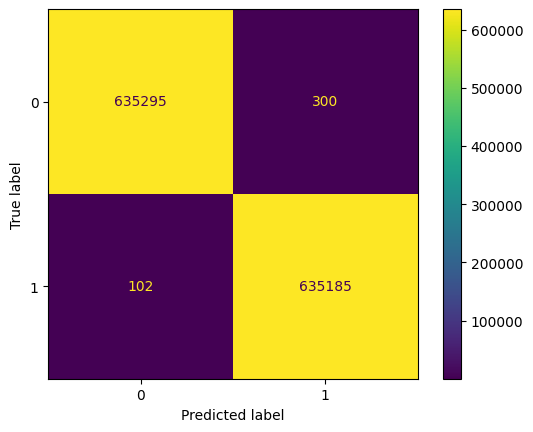

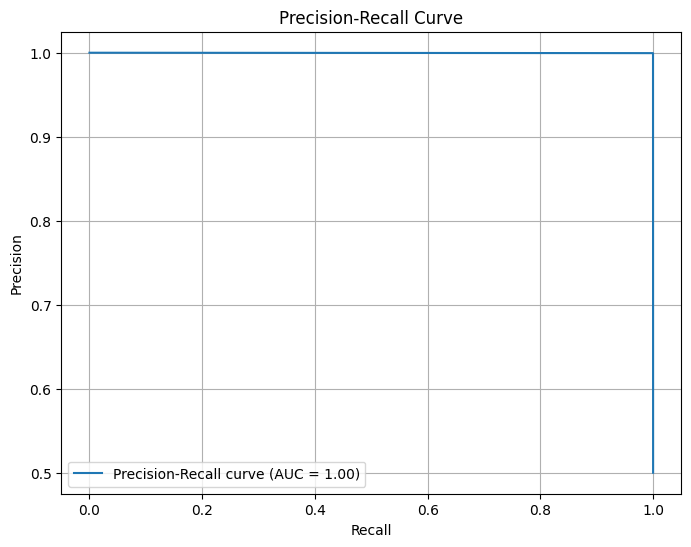

Matthews Correlation Coefficient (MCC): 0.9994
Precision-Recall AUC: 0.9997


In [ ]:
## Decision Tree  Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming data is already loaded and split into X_train, X_test, y_train, y_test
# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Cross-validation with Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Collect cross-validation scores
cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=kf, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation accuracy: {cv_scores.std():.4f}")

# Train the model using the entire training set
dt.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test_scaled)
y_pred_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

# Evaluation Metrics
print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.classes_).plot()

# Plot Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_dt)
pr_auc = auc(recall, precision)  # Area under the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred_dt)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


print(f"Precision-Recall AUC: {pr_auc:.4f}")


Cross-validation scores: [0.99965816 0.99966523 0.99970138 0.99967545 0.99968645]
Mean cross-validation accuracy: 0.9997
Standard deviation of cross-validation accuracy: 0.0000
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    635595
           1       0.99      1.00      0.99    635287

    accuracy                           0.99   1270882
   macro avg       0.99      0.99      0.99   1270882
weighted avg       0.99      0.99      0.99   1270882

Accuracy: 0.9947
Random Forest Classifier: Confusion Matrix


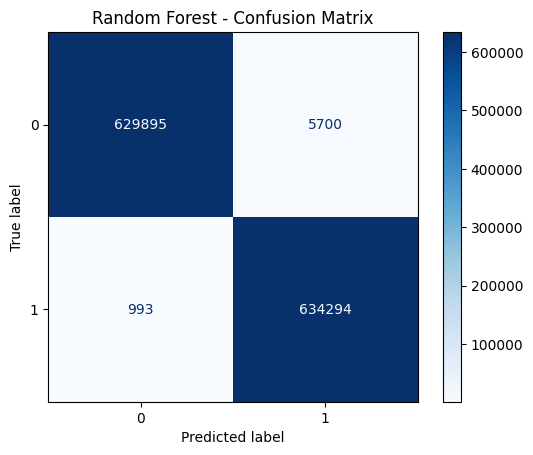

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Random Forest model configuration
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation accuracy: {cross_val_scores.mean():.4f}")
print(f"Standard deviation of cross-validation accuracy: {cross_val_scores.std():.4f}")

# Train and evaluate on the full train-test split
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Classification report and accuracy
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Confusion Matrix
print('Random Forest Classifier: Confusion Matrix')
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_).plot(cmap='Blues')

# Show the confusion matrix plot
plt.title('Random Forest - Confusion Matrix')
plt.show()


In [ ]:
# Unsupervised Learning

from sklearn.ensemble import IsolationForest

# Train an Isolation Forest model for anomaly detection
iso_forest = IsolationForest(contamination=0.01)
y_pred_if = iso_forest.fit_predict(X)

# Convert anomaly labels (-1 for outliers) to binary classification (1 for fraud, 0 for normal)
y_pred_if = [1 if x == -1 else 0 for x in y_pred_if]

# Evaluate anomaly detection results
print(classification_report(y, y_pred_if))
print(f"Accuracy: {accuracy_score(y, y_pred_if)}")




              precision    recall  f1-score   support

           0       1.00      0.99      0.99   6354407
           1       0.03      0.26      0.06      8213

    accuracy                           0.99   6362620
   macro avg       0.52      0.62      0.53   6362620
weighted avg       1.00      0.99      0.99   6362620

Accuracy: 0.9893675875661284


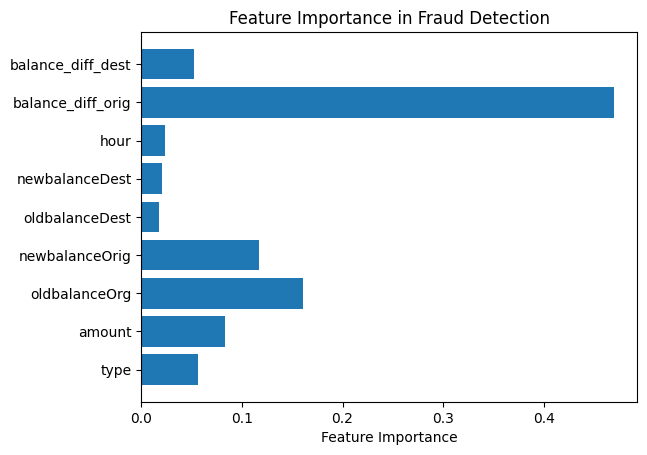

<Figure size 640x480 with 0 Axes>

In [ ]:
#Feature Importance
import matplotlib.pyplot as plt

# Plot feature importance for Random Forest model
importances = rf.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Fraud Detection')
plt.show()
plt.savefig('Feature Importance in Fraud Detection.png')

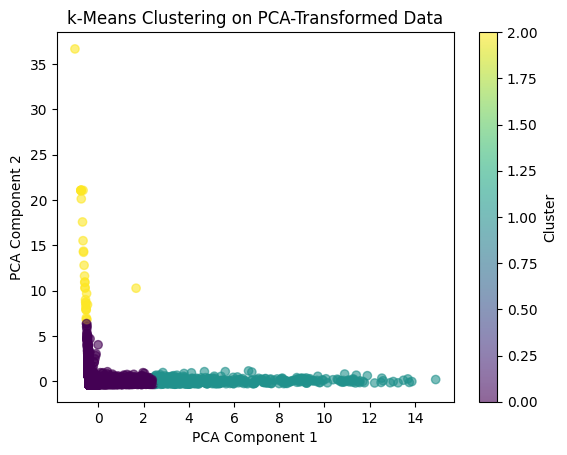

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Take a random sample for clustering
data_sample = data.sample(n=10000, random_state=42)

# Scale the sample and apply PCA
scaled_features_sample = scaler.fit_transform(data_sample[['amount', 'oldbalanceOrg', 'newbalanceOrig']])
pca_sample = pca.fit_transform(scaled_features_sample)

# Apply K-Means on PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
data_sample['cluster'] = kmeans.fit_predict(pca_sample)

# Visualize the clusters
plt.scatter(pca_sample[:, 0], pca_sample[:, 1], c=data_sample['cluster'], cmap='viridis', alpha=0.6)
plt.title('k-Means Clustering on PCA-Transformed Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


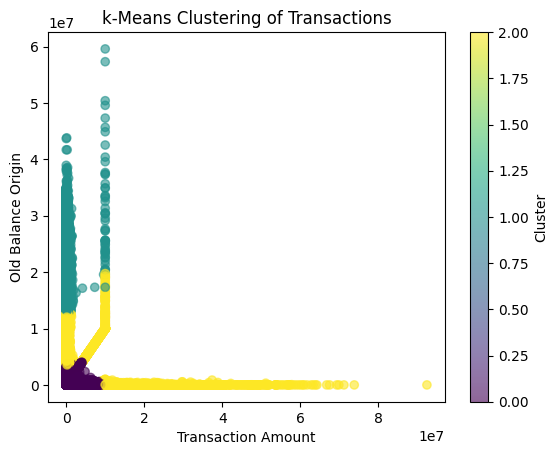

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features for clustering
features = data[['amount', 'oldbalanceOrg', 'newbalanceOrig']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply k-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.scatter(data['amount'], data['oldbalanceOrg'], c=data['cluster'], cmap='viridis', alpha=0.6)
plt.title('k-Means Clustering of Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Old Balance Origin')
plt.colorbar(label='Cluster')
plt.show()


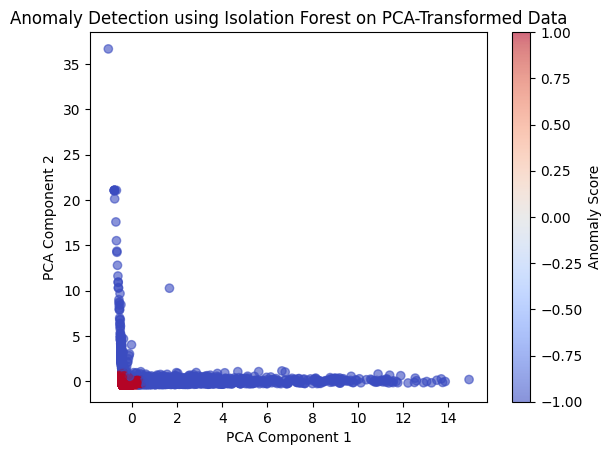

In [ ]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest on PCA-transformed data
iso_forest = IsolationForest(n_estimators=100, random_state=42)
data_sample['anomaly_score'] = iso_forest.fit_predict(pca_sample)

# Visualize the anomalies
plt.scatter(pca_sample[:, 0], pca_sample[:, 1], c=data_sample['anomaly_score'], cmap='coolwarm', alpha=0.6)
plt.title('Anomaly Detection using Isolation Forest on PCA-Transformed Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Anomaly Score')
plt.show()


Number of anomalies detected: 63319


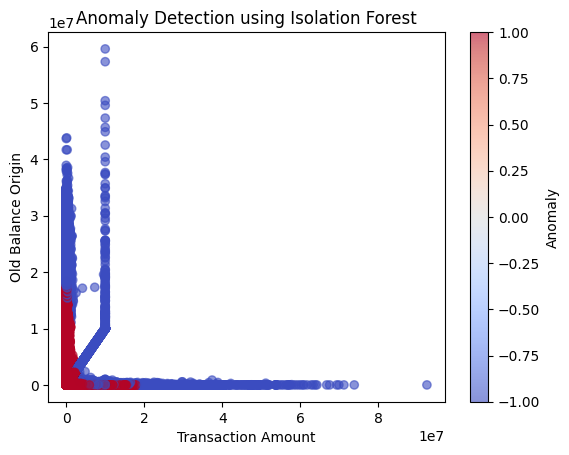

In [ ]:
from sklearn.ensemble import IsolationForest

# Select relevant features for anomaly detection
features = data[['amount', 'oldbalanceOrg', 'newbalanceOrig']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # 1% contamination
data['anomaly'] = iso_forest.fit_predict(scaled_features)

# Transactions flagged as -1 are anomalies (potential frauds)
anomalies = data[data['anomaly'] == -1]

# Check the count of anomalies
print(f"Number of anomalies detected: {len(anomalies)}")

# Visualize anomalies in the context of amount and old balance
plt.scatter(data['amount'], data['oldbalanceOrg'], c=data['anomaly'], cmap='coolwarm', alpha=0.6)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Transaction Amount')
plt.ylabel('Old Balance Origin')
plt.colorbar(label='Anomaly')
plt.show()
